# 1. EXPLOREAI

## 1.1. Simple linear Regression example

## Linear regression in sci-kit learn
   
Now that you understand how least squares linear regression works, let's implement it using sci-kit learn.   

We'll start by loading the LinearRegression library.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# Load dataset and set the first column as the index
df = pd.read_csv('data/exports%20ZAR-USD-data.csv', index_col=0)

# Rename columns to 'Y' for the dependent variable and 'X' for the independent variable
df.columns = ['Y', 'X'] # Rename the columns of the dataframe to 'Y' and 'X'

In [2]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

In [3]:
# Let's create a `LinearRegression()` object with all the default parameters.
# Initialise the LinearRegression model
lm = LinearRegression()

### Fitting the linear model

With the object created, we will then need to fit the model to our data. This is done using the `.fit()` function.
We can see that the `.fit()` function requires two parameters (`X` and `y`), with an optional third parameter, `sample_weight`.   

The `sample_weight` parameter would be useful in situations where the observations in our data have unequal errors - think weight vs height of university students where some students were weighed with an older analogue scale and others were weighed with a new digital scale.   

We have no reason to believe that any of our data is any more, or any less trustworthy so we'll leave out the optional weights parameter.

In [4]:
# Reshape the X array to a 2D array as required by scikit-learn, converting from pandas Series to numpy array if necessary
X = df.X.values[:, np.newaxis]

# Fit the linear model to the data
lm.fit(X, df.Y)

LinearRegression()

**If needed, the model parameters found by the `.fit()` function can be obtained as follows:**

In [5]:
# Extract the slope (coefficient) and intercept from the fitted model
m = lm.coef_[0]
c = lm.intercept_

# Print the slope and intercept
print("Slope:\t\t", m)
print("Intercept:\t", c)

Slope:		 0.00011350725765884299
Intercept:	 1.844811467042648


### Getting model predictions
To obtain $y$ values from our linear regression model we use the `.predict()` function. Given an array of $x$ values, this function evaluates the fitted model at those $x$ values and returns the corresponding $y$ values. Note that in this case, the `.predict()` function does exactly what the `gen_y()` function we created earlier does. We will explore the concept of prediction in depth in later tutorials.

In [6]:
# Use the fitted model to generate Y values from the X values
gen_y = lm.predict(X)

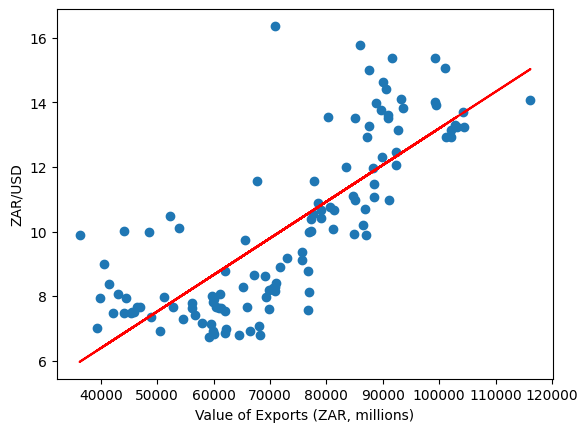

In [7]:
# plot the results
plt.scatter(X, df.Y)  # Plot the original data
plt.plot(X, gen_y, color='red')  # Plot the line connecting the generated y-values

# Label the axes
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")

plt.show()

## Assessing the model accuracy
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [8]:
# Calculate and print the Residual Sum of Squares (RSS) for the fitted model
print("Residual sum of squares:", ((gen_y - df.Y) ** 2).sum())

Residual sum of squares: 321.4571665525765


### Sci-kit learn error metrics
Sci-kit learn also has implementations of common error metrics which will make things easier for us to assess the fit of our model.   

In addition to RSS, there are some other metrics we can use:

**Mean Squared Error (MSE)** measures the average of the squares of the errors between actual and predicted values in a linear regression model. It assesses the fit of the model by quantifying the variance between predicted and observed values, with lower values indicating a better fit.
$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R squared ($R^2$)** quantifies the proportion of the variance in the dependent variable that is predictable from the independent variable(s) in a linear regression. It assesses the strength of the relationship between the model's predictions and the actual data, with values closer to 1 indicating a stronger relationship.
$$R^2 = 1 - \frac{RSS}{TSS}$$   
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

We can compute these metrics using sci-kit learn as follows:

In [9]:
# Import metrics from scikit-learn
from sklearn import metrics

# Calculate and print the Mean Squared Error (MSE) between the observed and predicted Y values
print('MSE:', metrics.mean_squared_error(df.Y, gen_y))

MSE: 2.6788097212714708


In [10]:
# Calculate and print the RSS by multiplying the MSE by the number of observations
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_y)*len(X)) 

Residual sum of squares: 321.4571665525765


In [11]:
# Calculate and print the R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', metrics.r2_score(df.Y, gen_y))

R_squared: 0.6158417476896207


# 1.2.Multiple linear Regression

## 1.2.1. Multiple linear Regression example1

Recall that the simple linear regression equation is as follows:

$$Y = \beta_{0} + \beta_{1}X_1$$

where:
- $\beta_{0}$ is the intercept, interpreted as the value of $Y$ when $X_1 = 0$;
- $\beta_{1}$ is the coefficient, interpreted as the effect on $Y$ for a one unit increase in $X_1$; and
- $X_1$ is the single predictor variable.

Extending that idea to multiple linear regression is as simple as adding an **$X_{j}$** and corresponding **$\beta_{j}$** for each of the **$p$** predictor variables, where **$j$** is an element of the set **$[1,p]$**.
   
Hence in multiple linear regression, our regression equation becomes:   

**$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$**

where:

- **$Y$** is the reponse variable which depends on the **$p$ predictor variables**;
- **$\beta_0$** is the intercept, interpreted as the value of **$Y$** when _all_ predictor variables are equal to zero;
- **$\beta_j$** is the average effect on **$Y$** of a one unit increase in **$X_j$**, assuming all other predictors are held fixed.

## The dataset: `mtcars` 

As usual, we need to import a few Python libraries.

Next we will load our data as a pandas DataFrame. For this train, we'll be using the famous mtcars dataset, an extract from the 1974 US Motor Trend magazine, which comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles.

In [12]:
#read the dataset
df = pd.read_csv('data/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
#Explore the shape of the dataset
df.shape

(32, 11)

In [14]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


As we can see, the DataFrame contains multiple columns - 11 in total. 

Simple linear regression models make use of a single predictor variable when fitting a model. While that seems easy to understand, the world is seldom as simple as that. Real problems contain multiple variables and we need to take into account as many as necessary.

## Fitting a multivariate regression model

In `sklearn`, fitting a multiple linear regression model is similar to fitting a simple linear regression. This time, of course, our $X$ contains multiple columns, where it only contained one before. 

In [16]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [25]:
X[:5]

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,
Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [36]:
XX = X.values
XX

array([[  6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,   0.   ,
          1.   ,   4.   ,   4.   ],
       [  6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,   0.   ,
          1.   ,   4.   ,   4.   ],
       [  4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,   1.   ,
          1.   ,   4.   ,   1.   ],
       [  6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,   1.   ,
          0.   ,   3.   ,   1.   ],
       [  8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,   0.   ,
          0.   ,   3.   ,   2.   ],
       [  6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,   1.   ,
          0.   ,   3.   ,   1.   ],
       [  8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,   0.   ,
          0.   ,   3.   ,   4.   ],
       [  4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,   1.   ,
          0.   ,   4.   ,   2.   ],
       [  4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,   1.   ,
          0.   ,   4.   ,   2.   ],
       [  6.   , 167.6  , 123.   ,   

In [34]:
y[:5]

model
Mazda RX4            21.0
Mazda RX4 Wag        21.0
Datsun 710           22.8
Hornet 4 Drive       21.4
Hornet Sportabout    18.7
Name: mpg, dtype: float64

In [37]:
yy = df.iloc[:,0].values
yy

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [32]:
type(y)

pandas.core.series.Series

In [19]:
# create model object
lm = LinearRegression()

# import train/test split module
from sklearn.model_selection import train_test_split
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)


# train model
lm.fit(X_train, y_train)


LinearRegression()

In [27]:
X_train[:5]

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,
Ford Pantera L,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Toyota Corolla,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Cadillac Fleetwood,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Pontiac Firebird,8,400.0,175,3.08,3.845,17.05,0,0,3,2
Merc 280C,6,167.6,123,3.92,3.440,18.90,1,0,4,4


Having fit our model to the provided training data, we can now inspect its coefficients to get a better understanding of their influence on the predictions the model will provide.

In [22]:
# extract model intercept
beta_0 = float(lm.intercept_)
print(beta_0)
print("===============================================================")
lm.coef_

8.465282572242625


array([ 0.19020309,  0.00861316, -0.02286786,  1.47701433, -3.56478539,
        0.92435804, -1.24890449,  1.3408896 ,  0.48245792, -0.18735412])

In [23]:
# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
beta_js

,Coefficient
cyl,0.190203
disp,0.008613
hp,-0.022868
drat,1.477014
wt,-3.564785
qsec,0.924358
vs,-1.248904
am,1.340890
gear,0.482458
carb,-0.187354


The results show the coefficients of the features in the model. These coefficients indicate the change in the response variable for a one-unit change in the corresponding feature, holding all other features constant. Positive coefficients indicate a positive relationship with the response variable, while negative coefficients indicate a negative relationship.

Let's see what our model looks like in a few 2-dimensional plots by plotting `wt`, `disp`, `cyl`, and `hp` vs. `mpg`, respectively (top-left to bottom-right).

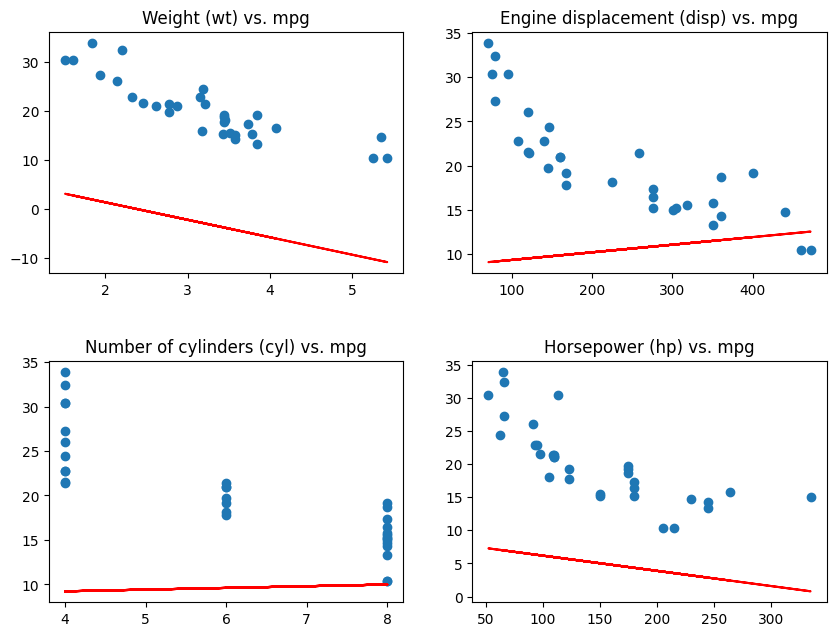

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['wt'], df['mpg'])
axs[0,0].plot(df['wt'], lm.intercept_ + lm.coef_[4]*df['wt'], color='red')
axs[0,0].title.set_text('Weight (wt) vs. mpg')

axs[0,1].scatter(df['disp'], df['mpg'])
axs[0,1].plot(df['disp'], lm.intercept_ + lm.coef_[1]*df['disp'], color='red')
axs[0,1].title.set_text('Engine displacement (disp) vs. mpg')

axs[1,0].scatter(df['cyl'], df['mpg'])
axs[1,0].plot(df['cyl'], lm.intercept_ + lm.coef_[0]*df['cyl'], color='red')
axs[1,0].title.set_text('Number of cylinders (cyl) vs. mpg')

axs[1,1].scatter(df['hp'], df['mpg'])
axs[1,1].plot(df['hp'], lm.intercept_ + lm.coef_[2]*df['hp'], color='red')
axs[1,1].title.set_text('Horsepower (hp) vs. mpg')

fig.tight_layout(pad=3.0)

plt.show()

 It looks as if some of the predictors have been somewhat correctly modelled by the regression. Others, like `disp` in the top-right, are nowhere near.

## Assessing model accuracy

Let's assess the fit of our multivariate model. For a rudimentary comparison, let's measure model accuracy against a simple linear regression model that uses only `disp` as a predictor variable for `mpg`.

In [29]:
# comparison linear model
slr = LinearRegression()

slr.fit(X_train[['disp']], y_train)

LinearRegression()

In [28]:
from sklearn import metrics
import math

Let's calculate the training Mean Squared Error (MSE), test MSE, and test Root Mean Squared Error (RMSE) for both our Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) models.

In [30]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [31]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training MSE,Test MSE,Test RMSE
SLR,8.201521,20.500165,4.527711
MLR,3.737534,11.520901,3.394245


 Clearly the multiple linear regression performed a lot better than using just `disp` to try and predict `mpg`, underpinning that the relationship between the dependent variable (mpg) and the independent variables is **not adequately captured by a single predictor**. 
 
 By incorporating multiple predictors simultaneously, the multiple linear regression model can **account for the combined influence of these factors** on the dependent variable, resulting in **improved predictive performance** and a **more accurate representation** of the underlying relationship in the data.

## 1.2.2 Multiple linear regression: Advanced regression analysis 1(example2)

Previously, we learned about fitting a regression model using multiple predictors using `sklearn`. It was an easy process requiring the same steps as fitting a simple linear regression model using just one predictor. We then performed a rudimentary quality assessment of the fitted model using the MSE and RMSE metrics.

Unfortunately, in terms of regression, `sklearn` has a very limited set of metrics and tools with which we can evaluate the quality of our fitted models. Furthermore, we are also in need of additional methods which will allow us to check the properties of our original data before we perform any modelling.  

In this train, we cover a thorough set of steps grounded in statistical tests to better determine the quality of a regression model. This train is an adaptation of [this Medium article](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685).



## The dataset - `mtcars`

For this train, we continue to make use of the MTCars dataset, to which we've already been introduced. We begin by importing some libraries, which will help us load and explore our data. 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#read the dataset
dfa = pd.read_csv('data/mtcars.csv', index_col=0)
dfa.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [41]:
#Explore the data
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


It appears both `vs` and `am` are categorical variables. From the dataset description [available here](https://rpubs.com/neros/61800), `vs` takes on a value of 0/1 depending on whether the engine layout is a *V* or *straight*, and `am` takes on a 0/1 value depending on whether the transmission is *automatic* or *manual*, both respectively.

Note that they don't need to be one-hot encoded because they are binary categorical variables (only two categories each), and they already make use of zeros and ones.

## Checking for linearity

The first thing we need to check is the mathematical relationship between each predictor variable and the response variable. What we are looking for here is known as linearity. A linear relationship means that a change in the response *Y* due to a one-unit change in the predictor $X_j$ is constant, regardless of the value of $X_j$.

If we fit a regression model to a non-linear dataset, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. To check for linearity, we can produce scatter plots of each predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

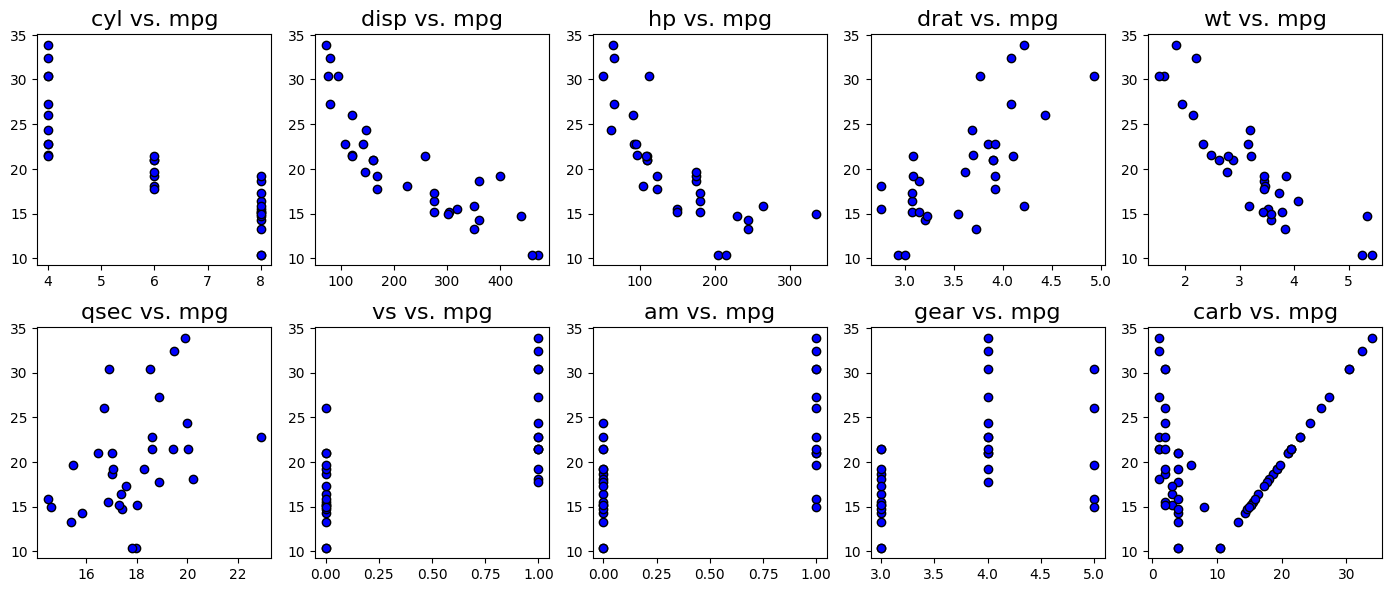

In [43]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=dfa[column],y=dfa['mpg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

It appears at least half of the variables, including all five on the top row, have an approximately linear relationship. Here, a trend between each of `cyl, disp, hp, drat, wt`, `qsec` and `mpg` seems to exist. However, `carb` and `gear` exhibit no linearity with `mpg`.

Based on these observations, it appears there is sufficient linearity present to proceed with applying a linear regression model. Let's continue.

We'll create a copy of the dataset so that we can play with it and process it using `statsmodels.OLS()`, which is the least squares regression module within the `statsmodels` library. We'll be carrying out our regression with this module.

In [44]:
df1 = dfa.copy()
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Pairwise scatter plots

As can be inferred by the name, a pairwise scatter plot simply produces a visual $n \times n$ matrix, where $n$ is the total number of variables compared, in which each cell represents the relationship between two variables. The diagonal cells of this visual represent the comparison of a variable with itself, and as such, they are substituted by a representation of the distribution of values taken by the visual.

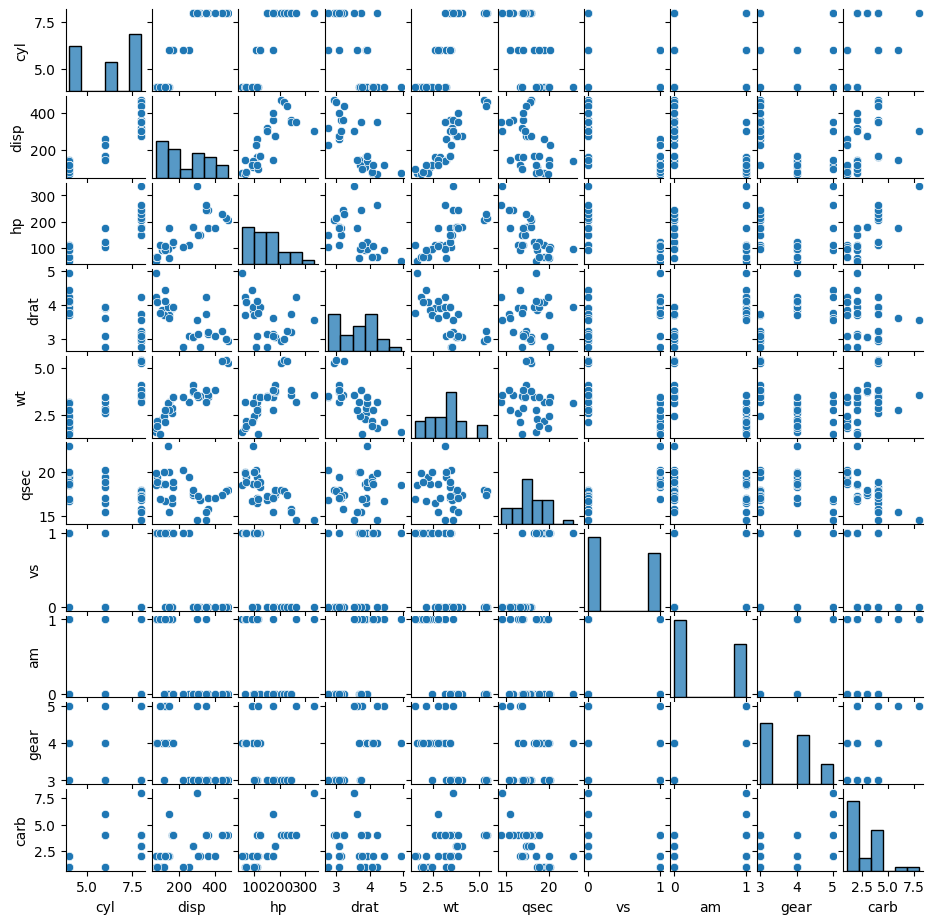

In [45]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(df1.drop('mpg', axis='columns'))
g.fig.set_size_inches(9,9)

### Correlation heatmap

Another way we can visually discover linearity between two or more variables within our dataset is through the use of a correlation heatmap. Similar to the pairwise scatter plot we produced above, this visual presents a matrix in which each row represents a distinct variable, with each column representing the correlation between this variable and another one within the dataset.    

In [46]:
# We only compare the predictor variables, and thus drop the target `mpg` column.
corr = df1.drop('mpg', axis='columns').corr()
corr

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
carb,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.057534,0.274073,1.000000


In [47]:
from statsmodels.graphics.correlation import plot_corr

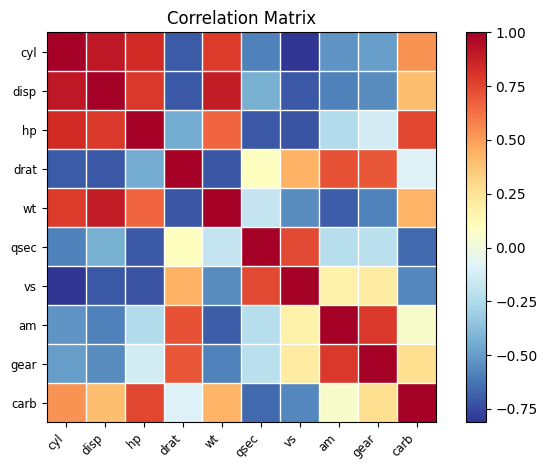

In [48]:
fig=plot_corr(corr,xnames=corr.columns)

From both the pairwise scatterplot and correlation heatmap, we can see several strong correlations among predictors:

- `disp` and `cyl`;
- `cyl` and `hp`;
- `hp` and `carb`;
- `cyl` and `vs`;
- `cyl` and `wt`.

Let's keep these in mind when we build and continue to check the quality of our model.

## Fitting the model using `statsmodels.OLS`

As was previously motivated within the train, `sklearn` is limited in terms of the metrics and tools available to evaluate the appropriateness of the regression models we fit. Thus, as a means to expand our analysis, we import the `statsmodels` library, which has a rich set of statistical tools that we can use. 

In [49]:
import statsmodels.formula.api as sm

### Generating the regression string

Those who are familiar with the R language will know that fitting a machine learning model requires a kind of string of the form:

`y ~ X`

which is read as follows: "Regress y on X". The `statsmodels` library works similarly, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [50]:
formula_str = df1.columns[0]+' ~ '+'+'.join(df1.columns[1:]); formula_str

'mpg ~ cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb'

In other words, we will regress `mpg` on all of the predictors.

### Construct and fit the model

We now go ahead and fit our model. We use the `ols` or Ordinary Least Squares regression model from the `statsmodels` library to do this:  

In [51]:
model=sm.ols(formula=formula_str, data=df1)

In [52]:
fitted = model.fit()

### Print model summary

Unlike the `sklearn` models we've seen so far which only produce a couple of statistics following the fitting process, our new model produces a rich set of statistics to help us analyse its appropriateness.

In [53]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.79e-07
Time:                        01:44:12   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

The above result provides the summary output of the multiple linear regression model fitted to the data.

On the top of the summary report, we'll find the **Model information section**, which provides details about the type of model utilised and the estimation method employed. Following this, the **Model fit** section offers crucial metrics such as R-squared and adjusted R-squared, providing insights into how well the model fits the data. Additionally, the F-statistic, accompanied by its associated p-value, evaluates the overall significance of the model. Moving further down, the **Coefficients table** displays estimates, standard errors, t-values, and p-values for each predictor variable, elucidating their individual significance and impact on the dependent variable. Lastly, we'll encounter additional diagnostics, encompassing various diagnostic tests aimed at assessing the model's assumptions and identifying potential issues like multicollinearity or non-normality of residuals. This succinct summary encapsulates the most salient components of a stats model summary report, offering a comprehensive overview of the model's performance and reliability.

## 1.2.3 Multiple linear regression: Advanced regression analysis2 (example3)

## The dataset - `mtcars`

For this train, we continue to make use of the `mtcars` dataset. We begin by importing some libraries which will help us load and explore our data. 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
import ssl

# Set the path to the CA certificates bundle
ssl._create_default_https_context = ssl._create_unverified_context

In [57]:
df2 = pd.read_csv('data/MTcars.csv',index_col=0)
df2.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [58]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


Let's create a copy of the dataset so that we can play with and process it using `statsmodels.OLS()`.

In [59]:
df2a = df2.copy()

## Fitting the model using `statsmodels.OLS`

As was previously motivated, `sklearn` is limited in terms of the metrics and tools available to evaluate the appropriateness of the regression models we fit. Thus, to further expand our analysis, we import the `statsmodels` library, generate the regression string, fit the model using `ols` and finally print the model summary.

In [60]:
import statsmodels.formula.api as sm

In [61]:
#Generate the regression string
formula_str = df2a.columns[0]+' ~ '+'+'.join(df2a.columns[1:]); formula_str

'mpg ~ cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb'

In [62]:
#Construct and fit the model using ols
model=sm.ols(formula=formula_str, data=df1)
fitted = model.fit()

In [63]:
#Print the model summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.79e-07
Time:                        01:59:58   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

## Checking for independence

We have done checks for linearity and multicollinearity, which both refer to the predictor variables. Now we'll move on to checking some of the artefacts of the fitted model for three more statistical phenomena, which will further help us determine its quality.

### Residuals vs. predictor variable plots 

The first check we do involves plotting the residuals (vertical distances between each data point and the regression hyperplane). We are looking to confirm the independence assumption here, i.e., the residuals should be independent. If they are, we will see:

- Residuals approximately uniformly randomly distributed about the zero x-axes;

- Residuals not forming specific clusters.

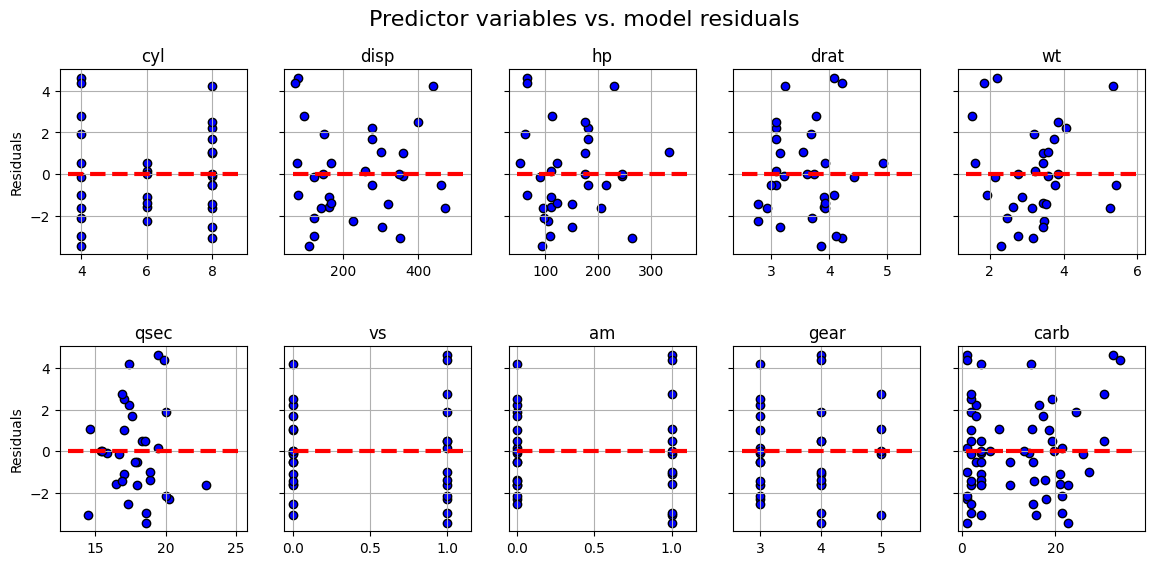

In [64]:
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df[column])
    xmax = max(df[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

# 2. WORLDQUANT UNIVERSITY

## 2.1. Simple linear Regression

## 2.2. Multiple linear Regression

## 3. LEAPR LABS

## 3.1.Simple linear Regression

In [12]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("data/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
cols = data.shape[1]
X = data.iloc[:,:cols-1].values
y = data.iloc[:,cols-1 : cols].values

In [15]:
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [16]:
y[:5]

array([[39343.],
       [46205.],
       [37731.],
       [43525.],
       [39891.]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Fitting data into simple linear regression

In [18]:
from sklearn.linear_model import LinearRegression
# model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## prediction the test set 

In [19]:
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

diff = y_test - y_pred_test
diff = diff.round(decimals=4)
print (diff)
print("==========================================================")
print (abs(diff))

[[-3017.9618]
 [ -308.623 ]
 [-7880.6572]
 [  118.8579]
 [ 1719.4371]
 [ 1631.4972]]
[[3017.9618]
 [ 308.623 ]
 [7880.6572]
 [ 118.8579]
 [1719.4371]
 [1631.4972]]


## Plotting data

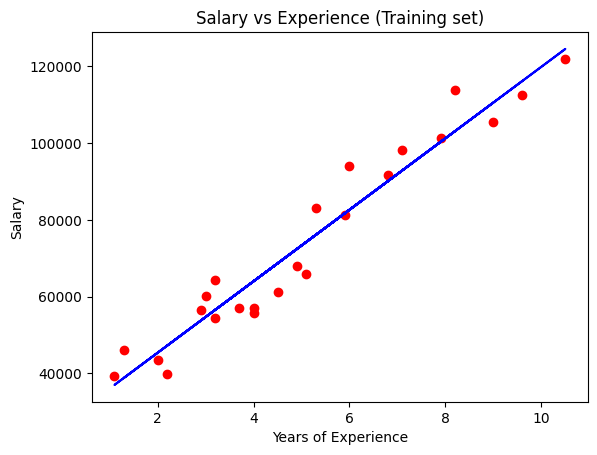

In [20]:
# Visualising the Traning set results
plt.scatter(X_train, y_train , color = 'red')
#y_pred_train = reg.predict(X_train)
plt.plot(X_train, y_pred_train, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 3.2. Multiple Linear Regression

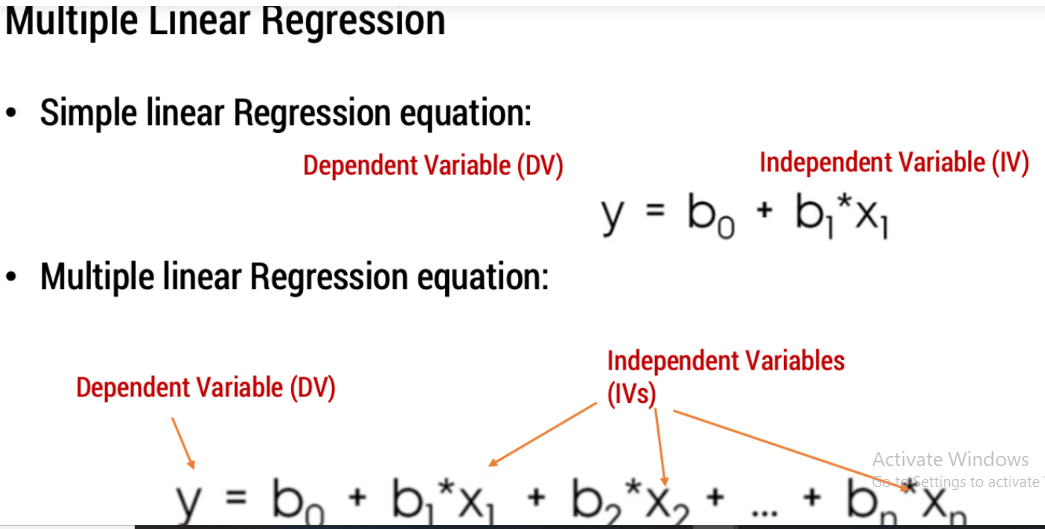
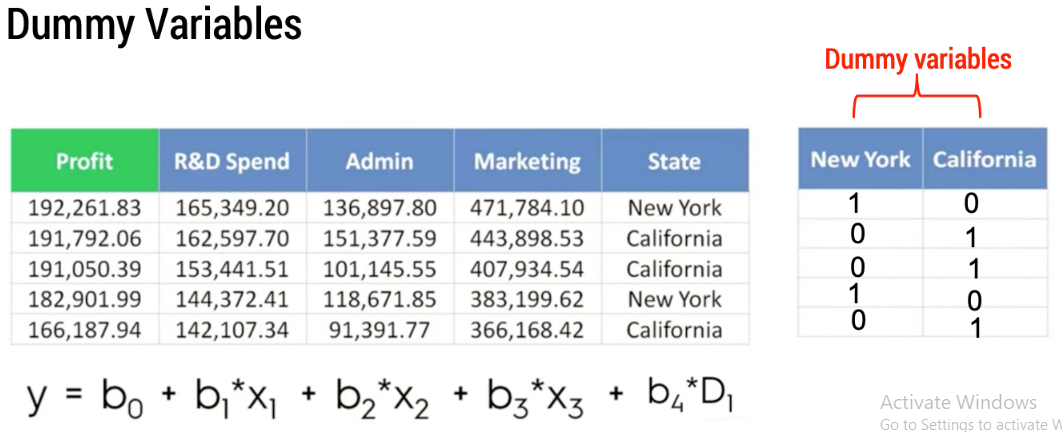
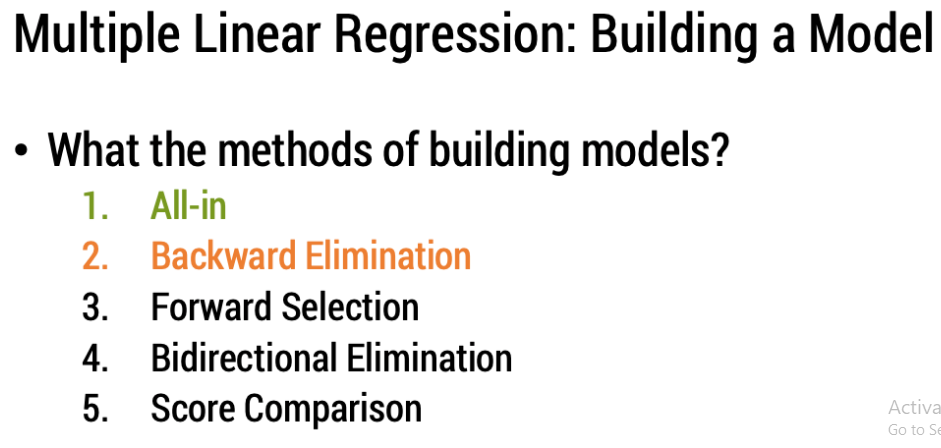

In [21]:
# # Importing the libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

In [22]:
# Importing the dataset
data = pd.read_csv('data/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
cols = data.shape[1]
X = data.iloc[:,:cols-1].values
y = data.iloc[:,cols-1 : cols].values

In [24]:
X[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [25]:
y[:5]

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94]])

## Encoding categorical data

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3]=labelencoder_X.fit_transform(X[:, 3])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## avoiding dummy variable trap

In [28]:
X = X[:, 1:] # all rows , all col form 1 to end, remove 1st col

In [29]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Fitting multiple linear regression

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#take training parameter

LinearRegression()

## Predicting the test result

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
diff = y_test - y_pred
diff = diff.round(decimals=4)
diff

array([[   267.1784],
       [ 11677.1224],
       [ 13674.2115],
       [  5822.7315],
       [ 12512.9078],
       [-11152.9323],
       [ 13377.3679],
       [ -1308.1737],
       [ -3617.1853],
       [ -1733.1257]])